In [1]:
import plotly.express as px
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error, r2_score
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset_train_path = '/home/nata-brain/Documents/tcc/web-eye-tracker/public/training/1685126241.2630084natanael/train_data.csv'
dataset_session_path = '/home/nata-brain/Documents/tcc/web-eye-tracker/public/sessions/1685126241.2630084natanael/session_data.csv'

raw_dataset = pd.read_csv(dataset_train_path)
session_dataset = pd.read_csv(dataset_session_path)
dataset_t = raw_dataset
dataset_s = session_dataset.drop(['timestamp'], axis = 1)


In [3]:
px.line(session_dataset, y=["left_iris_x", "left_iris_y", "right_iris_x", "right_iris_y"], title="Left and Right Iris Position")

In [9]:
def model_for_mouse_x(X, Y1, model):
    print('-----------------MODEL FOR X------------------')
    # split dataset into train and test sets (80/20 where 20 is for test)
    X_train, X_test, Y1_train, Y1_test = train_test_split(X, Y1, test_size=0.2)

    model = model
    model.fit(X_train, Y1_train)

    Y1_pred_train = model.predict(X_train)
    Y1_pred_test = model.predict(X_test)

    Y1_test = normalizeData(Y1_test)
    Y1_pred_test = normalizeData(Y1_pred_test)
    
    print(f'Mean absolute error MAE = {mean_absolute_error(Y1_train, Y1_pred_train)}')
    print(f'Mean squared error MSE = {mean_squared_error(Y1_train, Y1_pred_train)}')
    print(f'Mean squared log error MSLE = {mean_squared_log_error(Y1_train, Y1_pred_train)}')
    print(f'MODEL X SCORE R2 = {model.score(X, Y1)}')
    #print(f'TRAIN{Y1_pred_train}')
    #print(f'TEST{Y1_pred_test}')
    return model

def model_for_mouse_y(X, Y2, model):
    print('-----------------MODEL FOR Y------------------')
     # split dataset into train and test sets (80/20 where 20 is for test)
    X_train, X_test, Y2_train, Y2_test = train_test_split(X, Y2, test_size=0.2)

    model = model
    model.fit(X_train, Y2_train)

    Y2_pred_train = model.predict(X_train)
    Y2_pred_test = model.predict(X_test)


    Y2_test = normalizeData(Y2_test)
    Y2_pred_test = normalizeData(Y2_pred_test)

    print(f'Mean absolute error MAE = {mean_absolute_error(Y2_train, Y2_pred_train)}')
    print(f'Mean squared error MSE = {mean_squared_error(Y2_train, Y2_pred_train)}')
    print(f'Mean squared log error MSLE = {mean_squared_log_error(Y2_train, Y2_pred_train)}')
    print(f'MODEL Y SCORE R2 = {model.score(X, Y2)}')

    #print(f'TRAIN{Y2_pred_train}')
    #print(f'TEST{Y2_pred_test}')
    return model

def normalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

In [10]:
def train(model):
    # Drop the columns that will be predicted
    X = dataset_t.drop(['timestamp', 'screen_x', 'screen_y'], axis=1)

    Y1 = dataset_t.screen_x
    Y2 = dataset_t.screen_y
    # print('Y1 is the mouse_x column ->', Y1)
    # print('Y2 is the mouse_y column ->', Y2)

    MODEL_X = model_for_mouse_x(X, Y1, model)
    MODEL_Y = model_for_mouse_y(X, Y2, model)

    GAZE_X = MODEL_X.predict(dataset_s)
    GAZE_Y = MODEL_Y.predict(dataset_s)

    GAZE_X = np.abs(GAZE_X)
    GAZE_Y = np.abs(GAZE_Y)

    return GAZE_X, GAZE_Y

In [22]:
def showSaccades(model):
   plt.rcParams["figure.figsize"] = [7.6, 5.5]
   plt.rcParams["figure.autolayout"] = True

   x, y           = train(model)
   datetime       = session_dataset.timestamp

   plt.plot(x, y, '*')
   """ i = 0

   for xy in zip(x, y):
      i = i+1
      plt.annotate(f'{i}', xy) """
      
   plt.show()

#### Regressão Linear padrão

-----------------MODEL FOR X------------------
Mean absolute error MAE = 399.93432181006534
Mean squared error MSE = 230157.63167955956
Mean squared log error MSLE = 1.75272107741231
MODEL X SCORE R2 = 0.30695553986889035
-----------------MODEL FOR Y------------------
Mean absolute error MAE = 111.49579179170625
Mean squared error MSE = 20061.134542346776
Mean squared log error MSLE = 0.4253719549646367
MODEL Y SCORE R2 = 0.7582732467365366


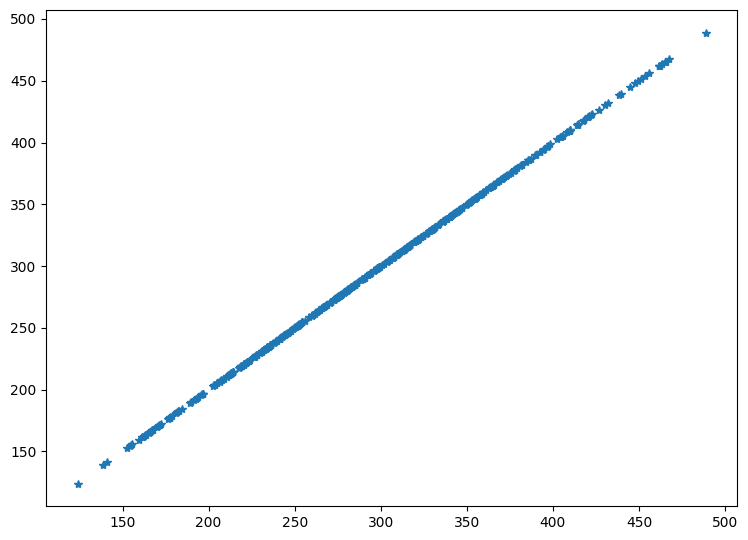

In [23]:
showSaccades(linear_model.LinearRegression())

#### Regressão Ridge

-----------------MODEL FOR X------------------
Mean absolute error MAE = 387.5482074666731
Mean squared error MSE = 220760.8799531483
Mean squared log error MSLE = 1.6600780219784645
MODEL X SCORE R2 = 0.2989927731166705
-----------------MODEL FOR Y------------------
Mean absolute error MAE = 110.9217453159226
Mean squared error MSE = 19278.12736071733
Mean squared log error MSLE = 0.4546442654771556
MODEL Y SCORE R2 = 0.7573473730421474


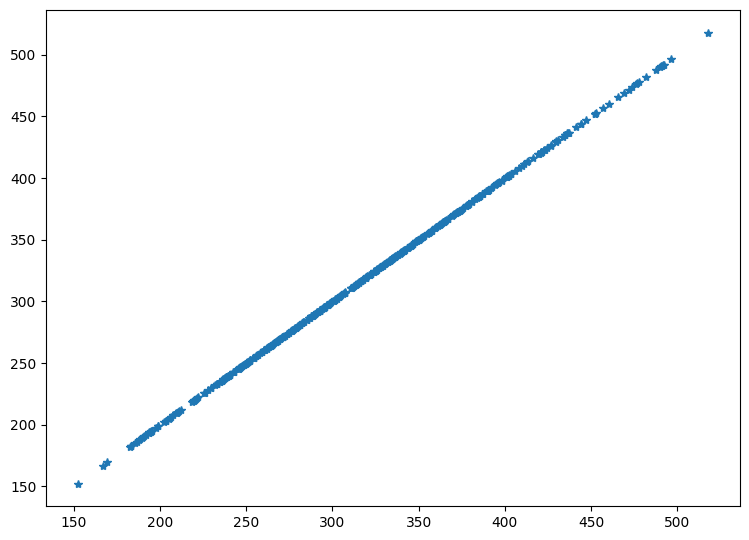

In [24]:
showSaccades(linear_model.Ridge(alpha=.5))

#### Regressão Ridge CV - utiliza um método para cross-validation

-----------------MODEL FOR X------------------
Mean absolute error MAE = 381.4537709661892
Mean squared error MSE = 207860.40108829536
Mean squared log error MSLE = 1.6934315452248683
MODEL X SCORE R2 = 0.2872472569481368
-----------------MODEL FOR Y------------------
Mean absolute error MAE = 101.49170069063705
Mean squared error MSE = 17714.184998417986
Mean squared log error MSLE = 0.35102932502830103
MODEL Y SCORE R2 = 0.7580421613174579


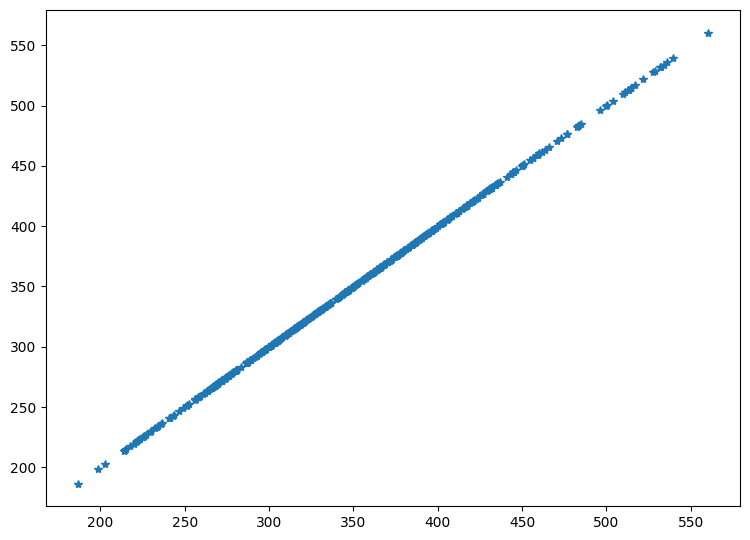

In [25]:
showSaccades(linear_model.RidgeCV(alphas=np.logspace(-6, 6, 13)))

#### Regressão utilizando Lasso

-----------------MODEL FOR X------------------
Mean absolute error MAE = 385.73943656877026
Mean squared error MSE = 217702.611505249
Mean squared log error MSLE = 1.6573437151099277
MODEL X SCORE R2 = 0.30767371418647227
-----------------MODEL FOR Y------------------
Mean absolute error MAE = 104.45635875736743
Mean squared error MSE = 18265.35017428518
Mean squared log error MSLE = 0.3035573774543131
MODEL Y SCORE R2 = 0.7604279015213925


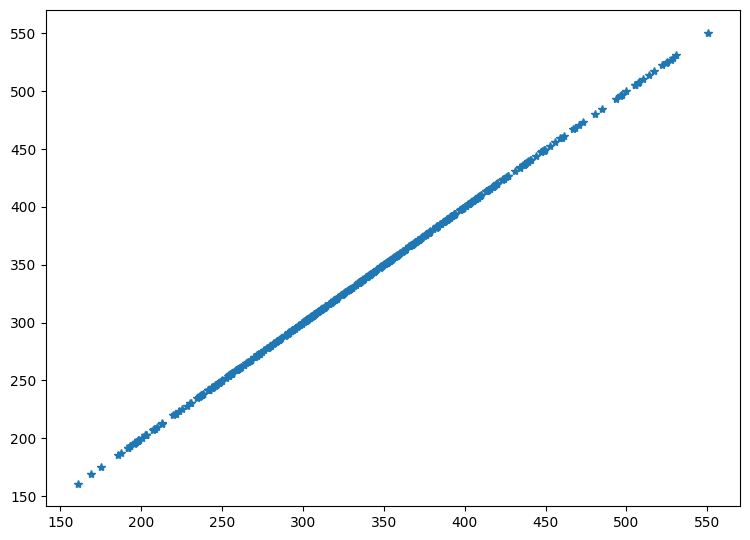

In [26]:
showSaccades(linear_model.Lasso(alpha=0.1))

In [15]:
from datetime import datetime

def processHetmap():
    return 0

-----------------MODEL FOR X------------------
Mean absolute error MAE = 391.7625874408479
Mean squared error MSE = 221344.72009550178
Mean squared log error MSLE = 1.8293058135952383
MODEL X SCORE R2 = 0.3035564537840326
-----------------MODEL FOR Y------------------
Mean absolute error MAE = 100.23737398389389
Mean squared error MSE = 16594.76876236327
Mean squared log error MSLE = 0.30334750594637916
MODEL Y SCORE R2 = 0.7585761541537358


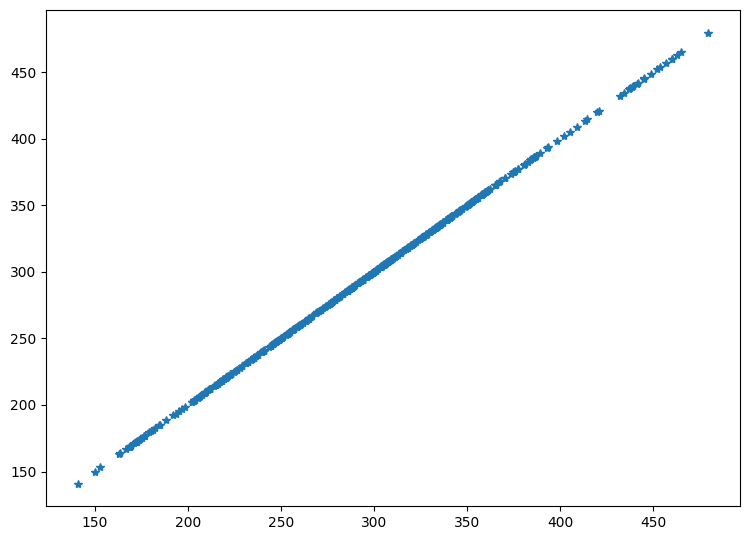

In [20]:
showSaccades(linear_model.LinearRegression())

(196, 4) (196, 1)


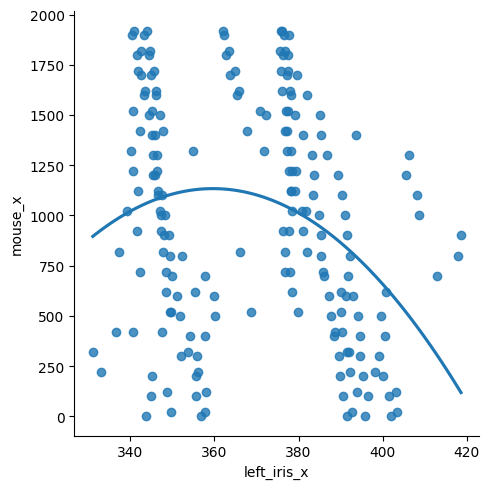

In [100]:
# Test

x_train = dataset_t.drop(['timestamp', 'mouse_x', 'mouse_y'], axis=1)
y_train = dataset_t.mouse_x.values.reshape(-1, 1)

print(x_train.shape, y_train.shape)

sns.lmplot(x ="left_iris_x", y ="mouse_x", data = dataset_t, order = 2, ci = None)
plt.show()


In [125]:
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size = 0.25, random_state = 1000)

model = linear_model.LinearRegression()
model.fit(X_train, Y_train)
print(model.score(X_test, Y_test))


0.42687598996186726


In [127]:
model_left_x = linear_model.LinearRegression()
model_left_x.fit(x_train, y_train)
model_left_x.score(x_train, y_train)


0.30872445106620683